# **Data Exploratio**

## Objectives

Answer business requirement 1:
The client is interested in discovering how the house attributes correlate with the sale price.

## Inputs

outputs/datasets/cleaned/HousePricesCleaned.csv


## Outputs

* Generate code that answers business requirement 1 and can be used to build Streamlit App
* Save plots in folder for documentation 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PriceProphet-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PriceProphet-PP5'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv")
df.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GrLivArea,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,2.667805,Av,48,None,1774,774,Unf,1828,...,11694,90.000000,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.000000,No,0,Unf,894,308,None,894,...,6600,60.000000,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.000000,No,713,ALQ,163,432,Unf,964,...,13360,80.000000,0.0,0,7,5,876,1921,2006,163500
3,1689,0.0,3.000000,No,1218,GLQ,350,857,RFn,1689,...,13265,75.460969,148.0,59,5,8,1568,2002,2002,271000
4,1541,0.0,3.000000,No,0,Unf,1541,843,RFn,1541,...,13704,118.000000,150.0,81,5,7,1541,2001,2002,205000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1168 non-null   int64  
 1   2ndFlrSF      1168 non-null   float64
 2   BedroomAbvGr  1168 non-null   float64
 3   BsmtExposure  1168 non-null   object 
 4   BsmtFinSF1    1168 non-null   int64  
 5   BsmtFinType1  1168 non-null   object 
 6   BsmtUnfSF     1168 non-null   int64  
 7   GarageArea    1168 non-null   int64  
 8   GarageFinish  1168 non-null   object 
 9   GrLivArea     1168 non-null   int64  
 10  KitchenQual   1168 non-null   object 
 11  LotArea       1168 non-null   int64  
 12  LotFrontage   1168 non-null   float64
 13  MasVnrArea    1168 non-null   float64
 14  OpenPorchSF   1168 non-null   int64  
 15  OverallCond   1168 non-null   int64  
 16  OverallQual   1168 non-null   int64  
 17  TotalBsmtSF   1168 non-null   int64  
 18  YearBuilt     1168 non-null 

# Correlation and PPS Analyses

Our dataset has four categorical variables that are of object data type. So we need to encode them so that we can use them to calculate correlation coefficients.

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)


(1168, 37)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LotFrontage,MasVnrArea,...,BsmtFinType1_LwQ,BsmtFinType1_BLQ,GarageFinish_Unf,GarageFinish_None,GarageFinish_RFn,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,1828,0.0,2.667805,48,1774,774,1828,11694,90.000000,452.0,...,0,0,1,0,0,0,1,0,0,0
1,894,0.0,2.000000,0,894,308,894,6600,60.000000,0.0,...,0,0,0,1,0,0,0,1,0,0
2,964,0.0,2.000000,713,163,432,964,13360,80.000000,0.0,...,0,0,1,0,0,0,0,1,0,0
3,1689,0.0,3.000000,1218,350,857,1689,13265,75.460969,148.0,...,0,0,0,0,1,0,1,0,0,0
4,1541,0.0,3.000000,0,1541,843,1541,13704,118.000000,150.0,...,0,0,0,0,1,0,1,0,0,0


Now our dataset has 37 columns, because the categorical variables have been encoded and their categories converted to separate columns with binary values (0 0r 1).

Next, we define functions that will calculate the correlations, create heatmaps and display them.

In [10]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  """
  Function to create heatmap using correlations.
  """
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
     # Save heatmaps to docs folder
    if df.name == "corr_spearman":
      plt.savefig(f'docs/plots/heatmap_corr_spearman.png', bbox_inches='tight')
    else:
      plt.savefig(f'docs/plots/heatmap_corr_pearson.png', bbox_inches='tight')
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    """
    Function to create heatmap using pps.
    """
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      # Save heatmap to docs folder
      plt.savefig(f'docs/plots/heatmap_pps.png', bbox_inches='tight')
      plt.show()


def CalculateCorrAndPPS(df):
  """
  Function to calculate correlations and pps.
  """
  df_corr_spearman = df.corr(method="spearman")
  df_corr_spearman.name = 'corr_spearman'
  df_corr_pearson = df.corr(method="pearson")
  df_corr_pearson.name = 'corr_pearson'

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):
  """
  Function to display the correlations and pps.
  """

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi-colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Power Predictive Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [11]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  420.0  0.052  0.095  0.0  0.0  0.0  0.068  0.572




* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



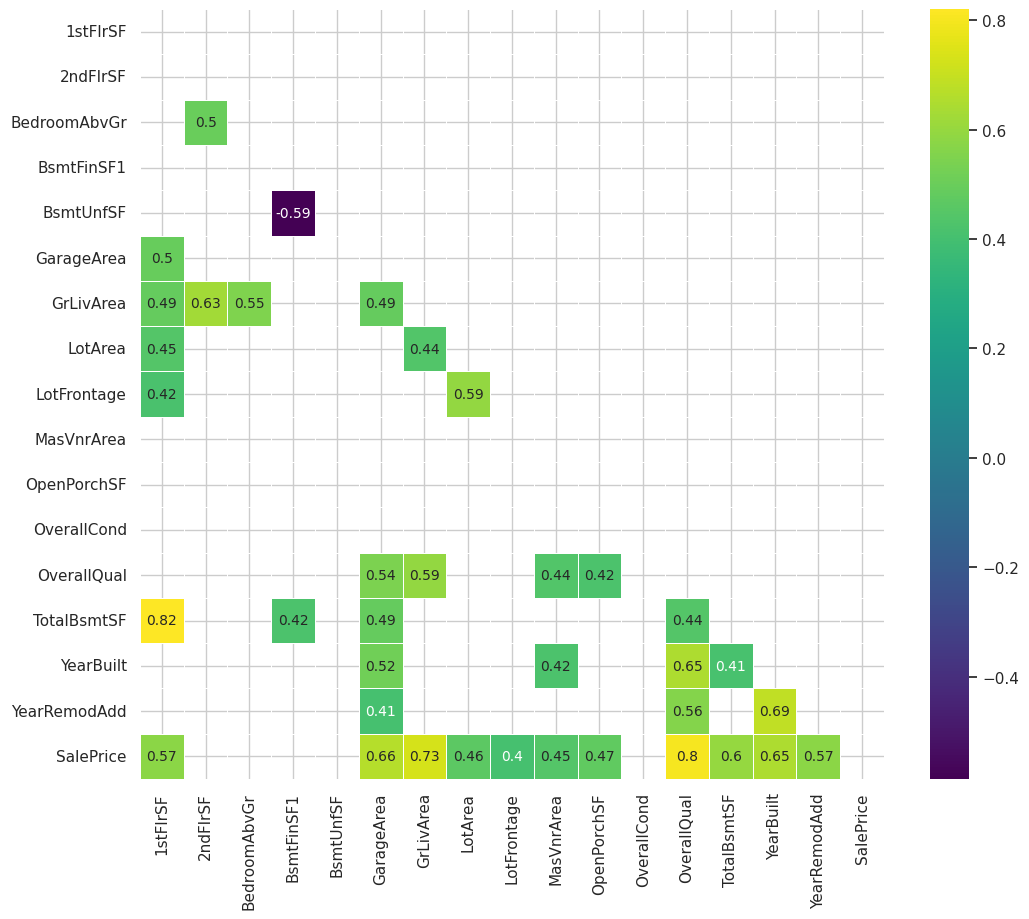



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



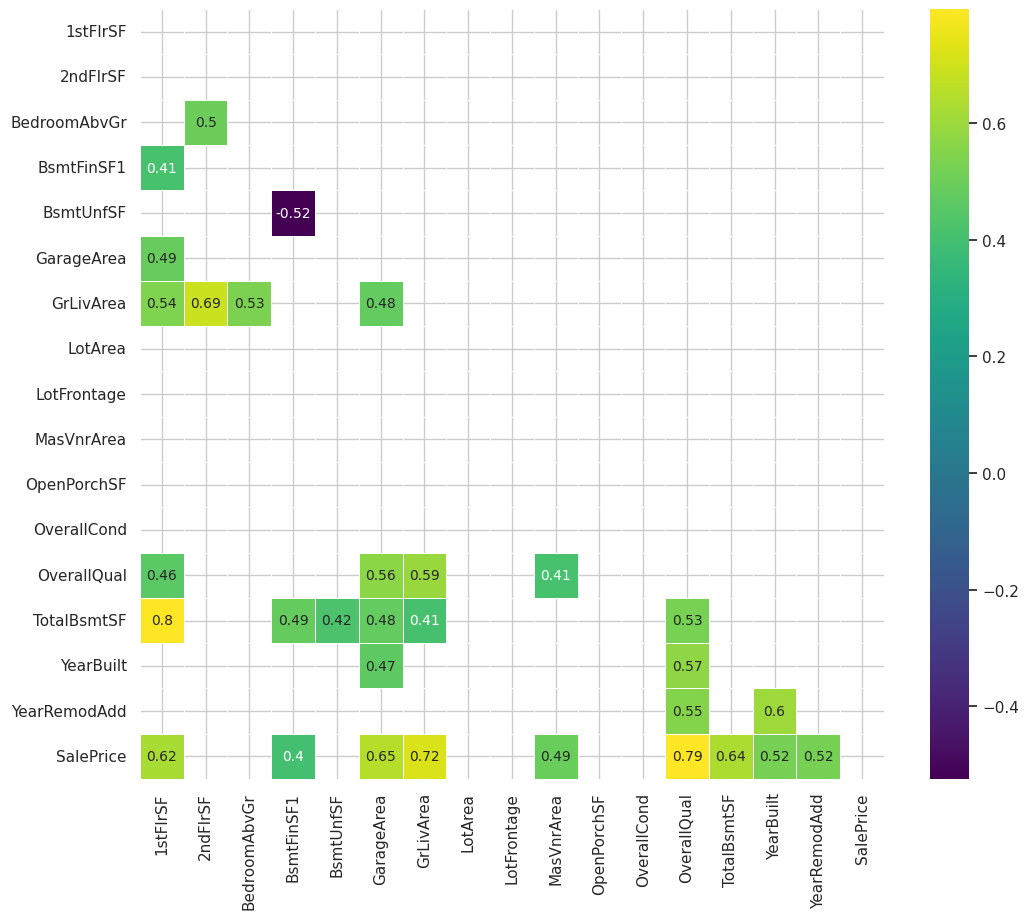



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



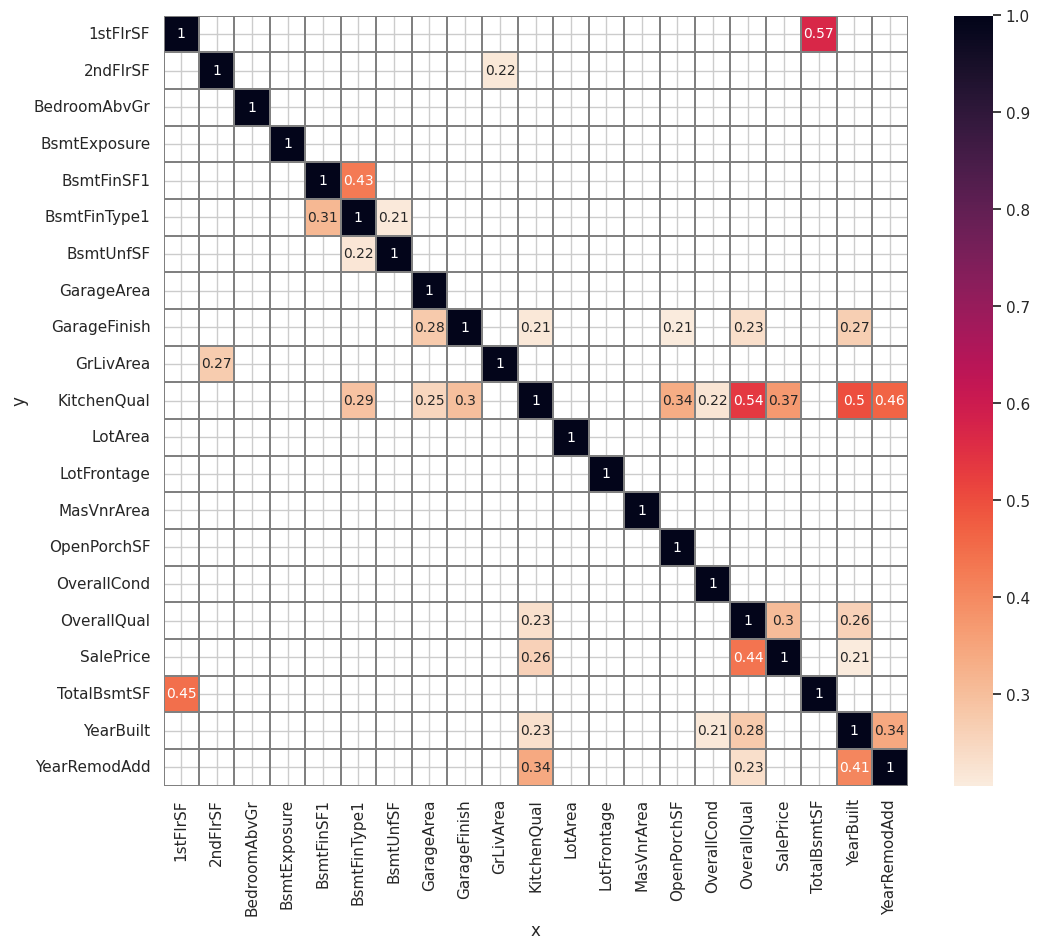

In [13]:
import os

if not os.path.exists('docs/plots/'):
    os.makedirs('docs/plots/')
    
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

* When we calculate the correlations with the .corr() method, the return value is a pandas series, and the first item is the correlation between SalePrice and SalePrice.

* As this correlation is 1 and carries no information, we use [1:] to exclude it from the series.

* Now we sort the remaining values considering the aboslute value, which is done by setting key=abs

* We know from the heatmaps above that the number of features that have correlations above the threshold of 0.4 is less than 10. So we show the first 10 values of each series below.

In [14]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.802395
GrLivArea         0.732180
GarageArea        0.663543
YearBuilt         0.646465
TotalBsmtSF       0.596989
KitchenQual_TA   -0.580209
YearRemodAdd      0.574195
1stFlrSF          0.573961
KitchenQual_Gd    0.482485
OpenPorchSF       0.474517
Name: SalePrice, dtype: float64

In [15]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790636
GrLivArea         0.721707
GarageArea        0.646603
TotalBsmtSF       0.635535
1stFlrSF          0.620740
KitchenQual_TA   -0.524083
YearBuilt         0.521242
YearRemodAdd      0.517822
MasVnrArea        0.492240
KitchenQual_Ex    0.485208
Name: SalePrice, dtype: float64

We will consider the top ten correlation levels at df_ohe and will study the associated variables at df

In [17]:
top_n = 10
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Based on the correlation study results, we will focus on the following variables and their relationship to house sale prices.

1stFlrSF

GarageArea

GrLivArea

KitchenQual

MasVnrArea

OpenPorchSF

OverallQual

TotalBsmtSF

YearBuilt

YearRemodAdd

These features reflect the relevance and potential predictive power of the size of a property, the quality of a house and whether the property has been built or remodeled recently or not.

In [18]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'KitchenQual', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

# EDA on selected variables

In [19]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GrLivArea,KitchenQual,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,774,1828,Gd,452.0,108,9,1822,2007,2007,314813
1,894,308,894,TA,0.0,0,5,894,1962,1962,109500
2,964,432,964,TA,0.0,0,5,876,1921,2006,163500
3,1689,857,1689,Gd,148.0,59,8,1568,2002,2002,271000
4,1541,843,1541,Gd,150.0,81,7,1541,2001,2002,205000


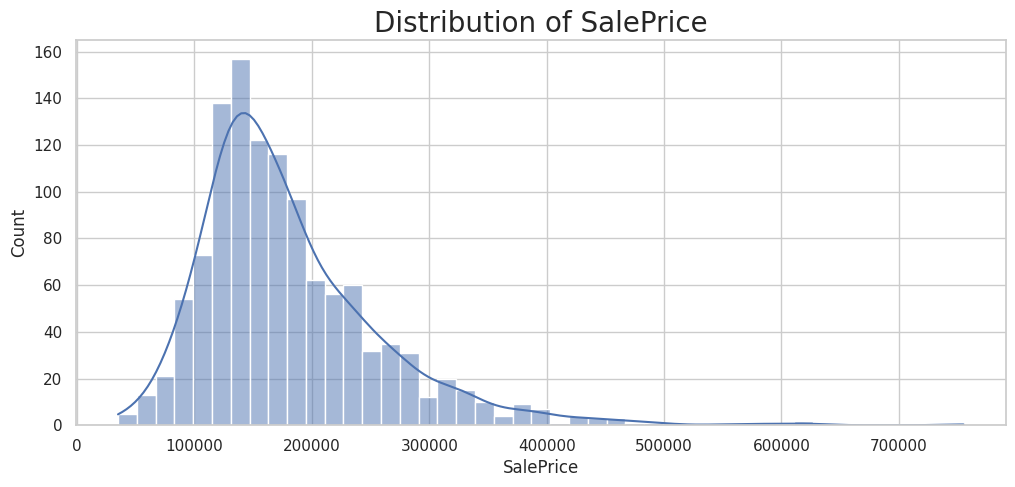

In [20]:
sns.set_style('whitegrid')
target_var = 'SalePrice'
time = ['YearBuilt', 'YearRemodAdd']

def plot_target_hist(df, target_var):
  """
  Function to plot a histogram of the target and
  save the figure to folder.
  """
  plt.figure(figsize=(12, 5))
  sns.histplot(data=df, x=target_var, kde=True)
  plt.title(f"Distribution of {target_var}", fontsize=20)
  plt.savefig(f'docs/plots/hist_plot_{target_var}.png', bbox_inches='tight')        
  plt.show()

plot_target_hist(df, target_var)

Now We are interested in answering business requirement 1, which is 'discovering how the house attributes correlate with the sale price.'

So we plot sale price in relation to both numerical and categorical features.

<Figure size 1200x500 with 0 Axes>

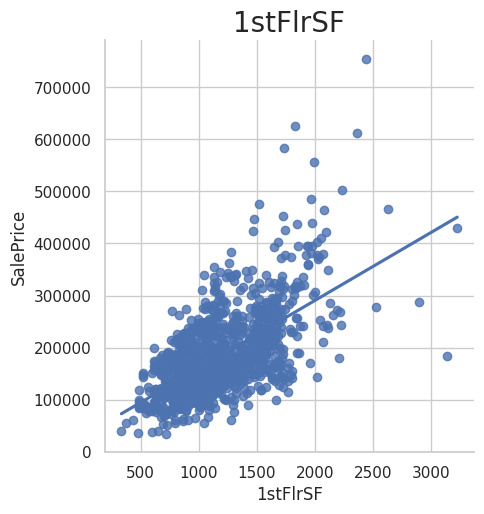

<Figure size 1200x500 with 0 Axes>

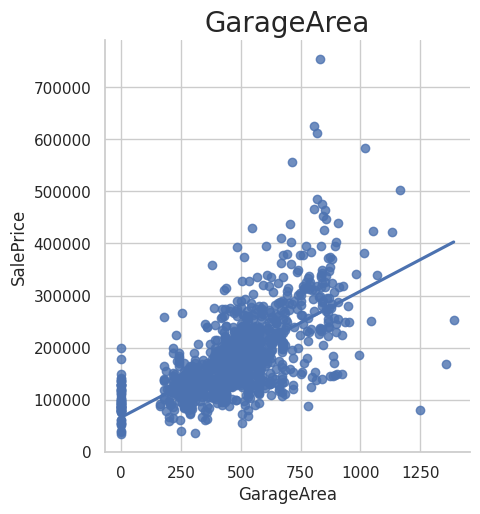

<Figure size 1200x500 with 0 Axes>

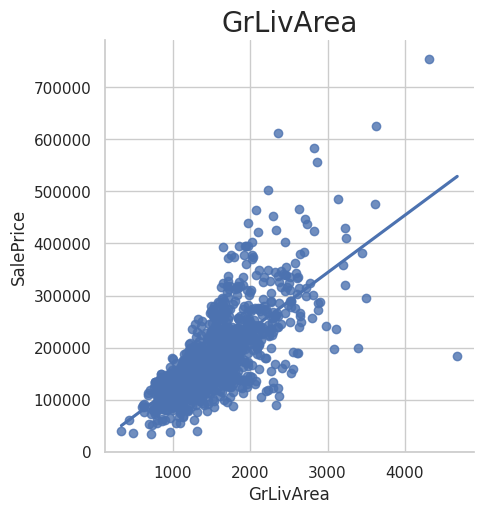

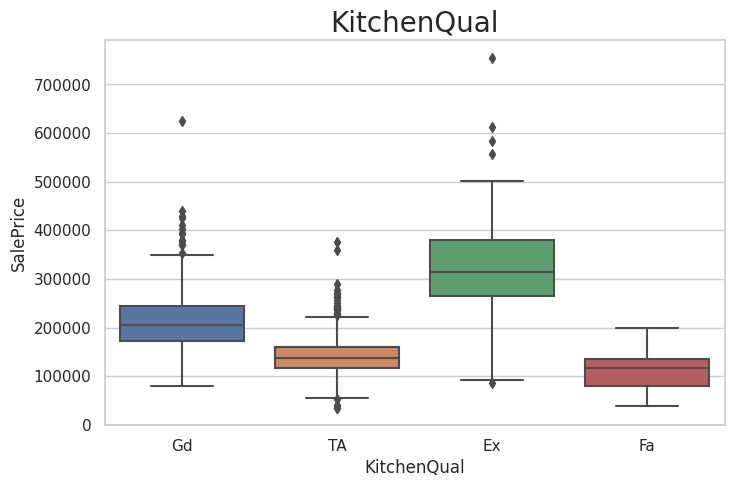

<Figure size 1200x500 with 0 Axes>

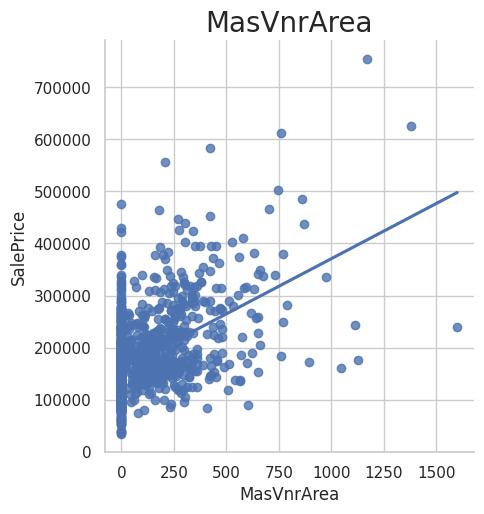

<Figure size 1200x500 with 0 Axes>

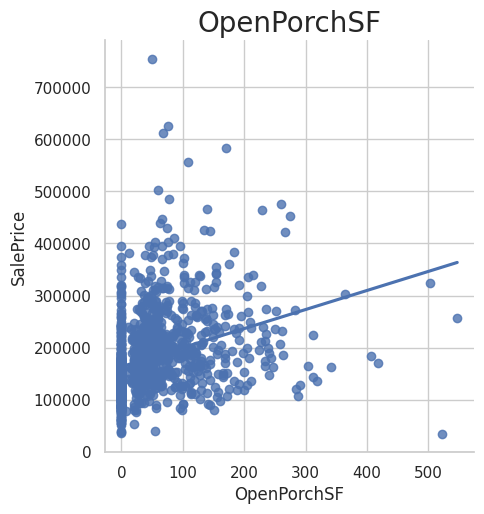

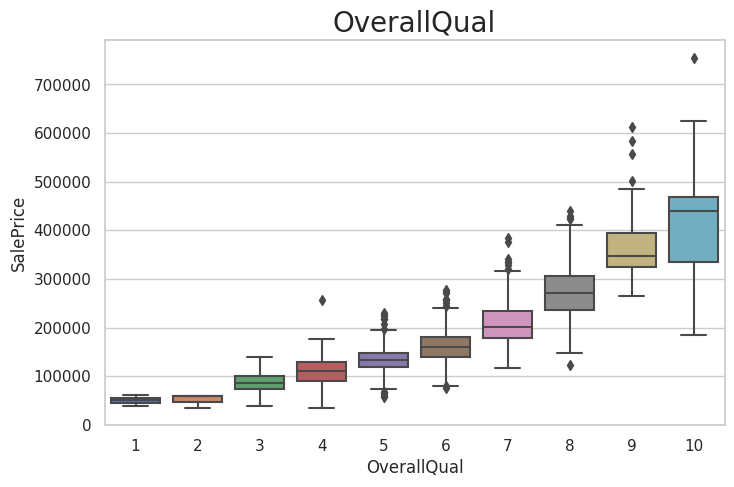

<Figure size 1200x500 with 0 Axes>

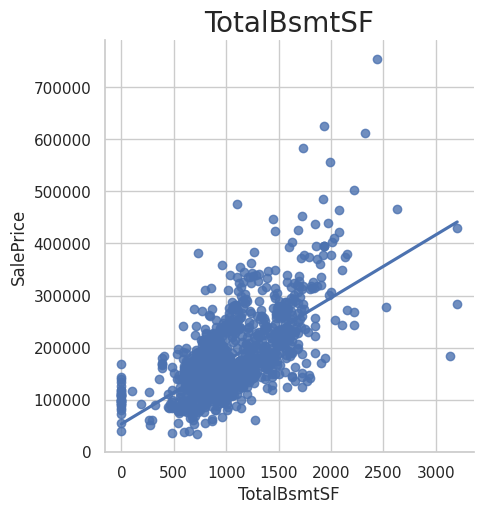

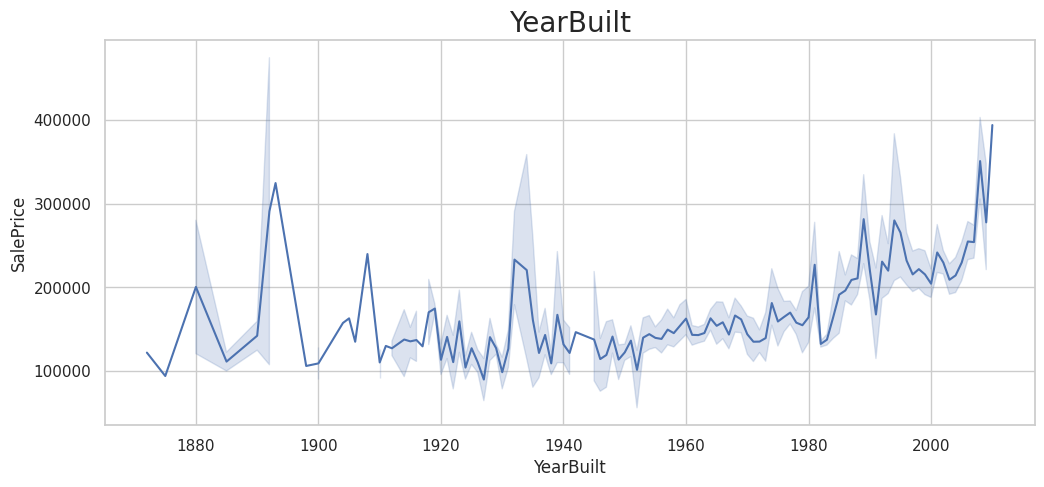

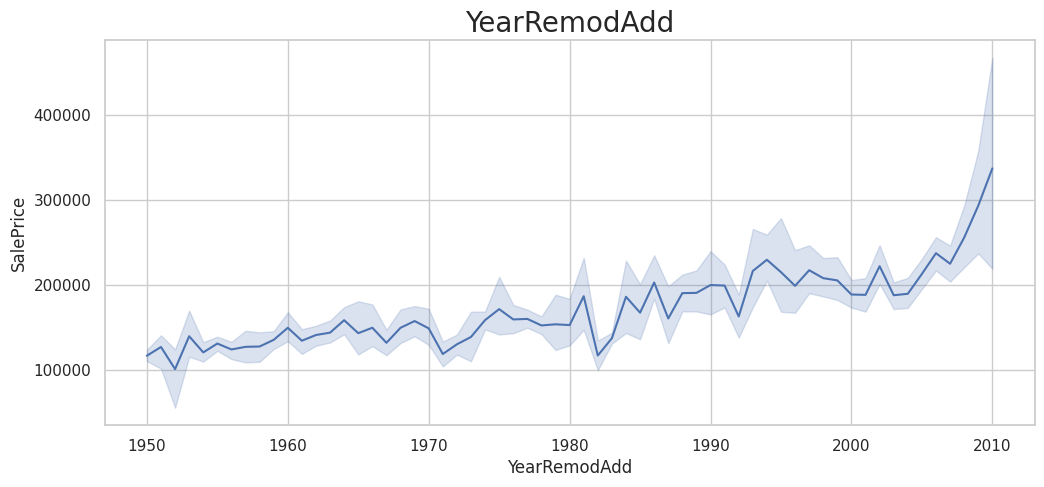

In [21]:
def plot_lm(df, col, target_var):
  """
  Function to create linear regression plots of the target and
  features with continuous values.
  It saves each figure to folder.
  """
  plt.figure(figsize=(12, 5))
  sns.lmplot(data=df, x=col, y=target_var, ci=None)
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/lm_plot_price_by_{col}.png', bbox_inches='tight')        
  plt.show()

def plot_line(df, col, target_var):
  """
  Function to create a line plot of the target and
  time variables (years).
  It saves each figure to folder.
  """
  plt.figure(figsize=(12, 5))
  sns.lineplot(data=df, x=col, y=target_var)
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/line_plot_price_by_{col}.png', bbox_inches='tight')        
  plt.show()

def plot_box(df, col, target_var):
  """
  Function to create a box plot of the target and
  categorical variables.
  It saves each figure to folder.
  """
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=df, x=col, y=target_var) 
  plt.title(f"{col}", fontsize=20)
  plt.savefig(f'docs/plots/box_plot_price_by_{col}', bbox_inches='tight')
  plt.show()


for col in vars_to_study:
  if len(df_eda[col].unique()) <= 10:
    plot_box(df_eda, col, target_var)
    print("\n\n")
  else:
    if col in time:
      plot_line(df_eda, col, target_var)
      print("\n\n")
    else:
      plot_lm(df_eda, col, target_var)
      print("\n\n")

# Conclusions

I NEED TO WRITE CONCLUSIONS

---

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
